## **Import Modules**

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading the dataset**

In [ ]:
df = pd.read_csv('/content/iris.csv')

In [ ]:
df.head()

,Sepal_length,sepal_width,Petal_Length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Sepal_length,sepal_width,Petal_Length,Petal_width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# to display stats about data
df.describe()

,Sepal_length,sepal_width,Petal_Length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# display basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# to display no.of samples on each class
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## **Preprocessing the dataset**

In [ ]:
# check for null values
df.isnull().sum()

Sepal_length    0
sepal_width     0
Petal_Length    0
Petal_width     0
Species         0
dtype: int64

## **Exploratory Data Analysis**

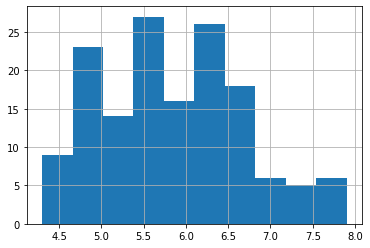

In [ ]:
 # histograms
 df['Sepal_length'].hist()

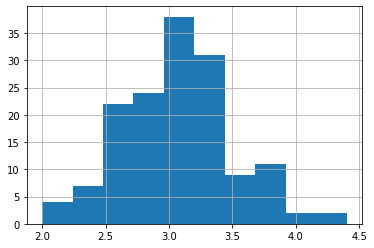

In [ ]:
 df['sepal_width'].hist()

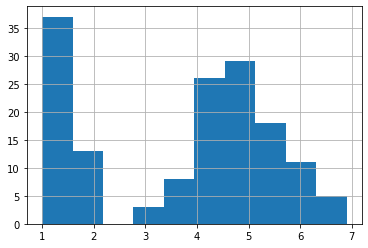

In [ ]:
 df['Petal_Length'].hist()

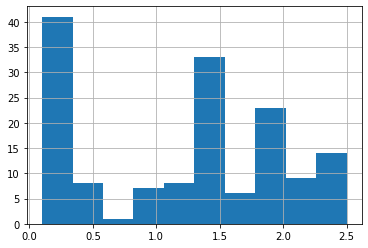

In [ ]:
 df['Petal_width'].hist()

In [ ]:
# scatter plot
colors = ['red','orange','blue']
species = ['Iris-virginica','Iris-setosa','Iris-versicolor']

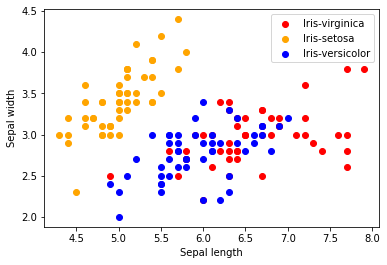

In [ ]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['Sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

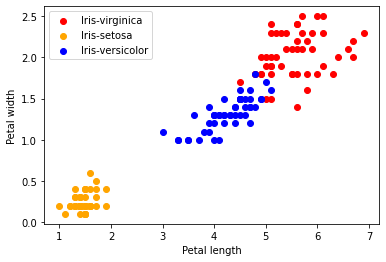

In [ ]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['Petal_Length'],x['Petal_width'],c=colors[i],label=species[i])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()

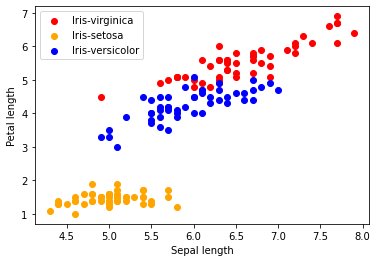

In [ ]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['Sepal_length'],x['Petal_Length'],c=colors[i],label=species[i])
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()

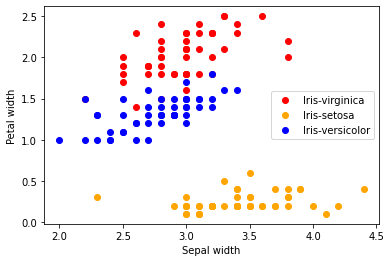

In [ ]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['sepal_width'],x['Petal_width'],c=colors[i],label=species[i])
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend()

## **Coorelation Matrix**


In [ ]:
df.corr()

,Sepal_length,sepal_width,Petal_Length,Petal_width
Sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.871754,-0.420516,1.000000,0.962757
Petal_width,0.817954,-0.356544,0.962757,1.000000


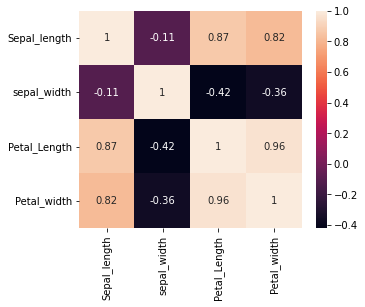

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

## **Label Encoder**


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Species'] = le.fit_transform(df['Species'])
df.tail()

,Sepal_length,sepal_width,Petal_Length,Petal_width,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
# training(70%) and testing(30%)
X = df.drop(columns=['Species'])
Y = df['Species']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30) 

In [ ]:
# Logistic regression(It is a classification model)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# training the model
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# print metric to get performance of the model
print('Accuracy: ',model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


In [ ]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# print metric to get performance of the model
print('Accuracy: ',model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# print metric to get performance of the model
print('Accuracy: ',model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


In [ ]:
prediction = model.predict(x_test)
print("Predicted values: ")
print(prediction)

Predicted values: 
[1 2 2 2 1 2 2 0 0 2 2 2 0 0 1 2 0 1 1 0 0 0 0 2 0 0 1 1 2 1 2 0 2 1 1 2 0
 1 1 0 1 2 2 2 1]
